## GROUP 4 REPORT (Preliminary) DAT 121
# **Machine Learning Models of Red Wine Taste Preferences from Physicochemcial Properties**
Ammar Alnaboulsi, Getinet Ayele Eshete, Muhammad Muntazir Naqvi, Tianyu Wang

Norwegian University of Life Sciences (NMBU), August 2020

# Summary

The goal of the study is to apply the data anlaysis methods and tools we have learned from DAT121 in a real-world business case, as the preparation for the advanced courses INF200 and INF221 that will start in Autumn 2020.  

In this study, we will deploy the red vinho verde wine dataset to build a series of machine learning models that predict the wine taste preferences based on physicochemical properties.

We have used six classfication techniques by using both feature selection and feature extraction methods, where Random Forest achieved the best performance or accuracy compared to other models. The final machine learning model has the potential to create business values in improving the wine making process by identifying the most influential physicochemical properties as well as rebranding top-rated wines to a more profitable market.




In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sn
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Importing dataset
df = pd.read_csv("winequality-red.csv", sep = ';')



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Introduction

### 1. Motivation for the study
Group 4 is comprised of a diversified combination in terms of academic background, including chemistry, economy, computer science and aerospace engineering. The learning curves among the team members vary to a large extent, presuming not everyone possess a sophisticated mathematical background. We find the course very intensive when imparting highly technical material, therefore, our motivation for the study is to close the gap through indepth understanding of data science theory and techniques, mastering of basic python and statistics learnings, so as to get ready for courses INF221 and INF200 starting in September 2020.

Through the group work and discussion, we believe that one of the best ways to reinforce our learning is through learning by doing and by explaining what we have digested to other team members.

### 2. Set the scene
After several rounds of test and trial in selecting the feasible raw data for our case study, we finally decided to use a large dataset [1] from the wine industry. The dataset contains 1599 samples of vinho verde red wine from the Minho region, the north of Portugal [1], targeting to predict the taste preferences (or quality) based on 11 physicochemical wine properties (listed below). 





In [ ]:
X=df.iloc[:, :-1]
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

According to P.Cortez et al.[2],this large dataset was collected through the easily available analytical tests at the wine certification step. Wine certification is mandatory for all wine makers with the intention to prevent any health-harming illegal adulteration of wines and to assure quality for the wine market. Wine certification is generally assessed by physicochemical and sensory tests[3], in which  physicochemical laboratory tests capture wine characters such as density, alcohol and pH value etc, while sensory tests are required to be performed by human tasters according to Portugese law, therefore the preference results are prone to subjective factors.

In the red wine dataset, "each sample was evaluated by a minimum of three sensory assessors (using blind tastes),which graded the wine on a scale that ranges from 0 (very bad) to 10 (excellent). The final sensory score is given by the median of these evaluations."[2] We have plotted the histograms of the taste preference classes based on the dataset, (Fig.1 Red wine) denoting a typical normal shape distribution - the classes are ordered and not balanced, as there are many more normal wines than excellent or poor ones.





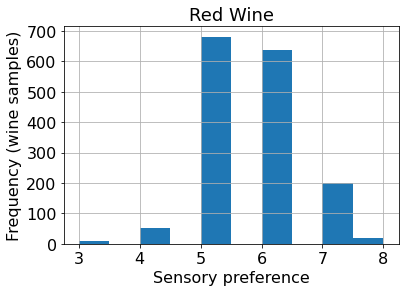

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df.hist(column='quality',bins=10)
plt.title("Red Wine",fontsize=18)
plt.xlabel("Sensory preference",fontsize=16)
plt.ylabel("Frequency (wine samples)",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

df['quality'].value_counts()



In this case study, we will test several algorithms to build machine learning models, with the goal to predict taste preferences. The prediction models can potentially create several business values for the wine producers:

1. To improve the wine making process by identifying the most influential physicochemical properties[2],
2. To stratify wines in target marketing[4]. More specifically, some top-rated wines could be rebranded (price, packaging, labels) to be at par with more expensive wine class displaying similar and desirable sensory profiles.[5]


### 3. Background for the study

The dataset that we have deployed in this study was collected from May 2004 to Februray 2007 and was initially used in the research paper published by P.Cortez et al.[2]. In the original research, the authors have used three regression techniques, multiple regression (MR), neural networks (NN) and support vector machines (SVM), aiming to predict the wine taste preference as the output. The research has achieved encouraging results with "the SVM model providing the best performances, outperforming the NN and MR techniques."[2]

We chose this dataset as the basis to our study for the following reasons: 

1.   The dataset is featured with accuracy and completeness with **minimum data cleaning required**. The raw data was the carefully sampled data tested at the official certification entity (CVRVV), an inter-professional organization working on improving the quality and marketing of vinho verde. Data were recorded by a computerised system (iLab) which automatically manages the process of wine sample testing from producer requests to laboratory and sensory analysis.[2]

2.  Considering the taste preference is not only a categorial outcome but also modeled in a discrete numerical scale from 0 to 10, we could view the dataset as both **regression and classification tasks**.

3.  Without knowing which physicochemical features (input) are relevant to taste preference (output), we will be able to test **feature selection and feature extraction methods** in this study.



In conlusion, we consider the background datasets to be versatile, providing us sufficient 'play ground' to test and practice what we have learned in this course to a larger extent. We also consider this case study to be a motivating real-world business case, through which we could strengthen our in-depth knowledge of data science.



### 4. What is new in this project?

In this project, we have chosen a handful of different regression and classification algorithms and compared their performances in order to select the best model. What worths mentioning is that the models we have used here did not include Neural Network and Support Vector Machines (SVM) as what P. Cortez et al. have applied in their research.



# 3  Theory and background

### 3.1 Prerequisites 

In order to understand the problem and the methods we are using in this project, the reader needs the following background knowledge:

- Fundamental Python programming skills
- Being familiar with essential tools for practicing data scientists such as Anaconda and Jupyter Notebook
- Statistical concepts such as Linear Regression,Classification, Supervised and Unsupervised Learning as well as Linear Model Selection and how to apply them in practice



### 3.2 Description of necessary theory
This section describes the basics of the regression and classification models that we used in this project.





The regression models included in this work include OLS, ridge, lasso and elastic net. They all work on the same principle with some modifications. The principle is to try to find a relationship between the dependent and the independent variables: y=c+b1x1+b2x2+……..+bnxn+e [6], where c is the intercept, bi are the regression coefficients related to each independent variables and e is the error of the regression.


The **OLS** has the following principle: “It calculates the best-fit line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line”[6].


“**Ridge Regression** is a technique used when the data suffers from multicollinearity (independent variables are highly correlated). Ridge regression solves the multicollinearity problem through shrinkage parameter λ (lambda). The shrinks the value of coefficients but doesn’t reaches zero, which suggests no feature selection feature”[6].

**Lasso regression** differs from the ridge regression: it causes some of the coefficients to be zero, meaning that the corresponding independent variables can be excluded from the selection [6].

“**ElasticNet** is hybrid of Lasso and Ridge Regression techniques” [6].

**Logistic regression**, despite the name, is not a regression method, but a classification method, which is mainly used if the output variable is binary. It uses the logit function, logit(p)= ln(p/(1-p)), where p is the probability for the event to happen or not to happen [6].





**K-Nearest Neighbors** (KNN) is an algorithm for supervised learning. The data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.[7]


**Decision Tree** is a Boolean function that outputs +1 or -1. 

The basic intuition behind a decision tree is to map out all possible decision paths in the form of a tree. 

Decision trees are built by splitting the training set into distinct nodes, where one nodes contains of all of or most of one category of the data. Decision trees are about testing an attribute and branching the cases based on the result of the test. Each internal node corresponds to a test, and each branch corresponds to the result of a test, and each leaf node assigns a classficiation.[8]

**Random Forests** is an algorithm combining multiple decision trees. It can be summarised in four simple steps:


I. Draw a random bootstrap sample of size 𝑛 (randomly choose 𝑛 samples from the training set with replacement)

II. Grow a decision tree from the bootstrap sample. At each node

> a. Randomly select 𝑑 features without replacement

> b. Split the node using the feature that provides the best split according to the objective function, for instance, maximizing the information gain

III. Repeat the steps 1-2 k times

IV. Aggregate the prediction by each tree to assign the class label by a majority
vote.[8] 

**Naive Bayes** assumes features are independent in each class. It is useful when p is large, and so multivariate methods like QDA and even LDA break down.Gaussian naive Bayes assumes each Σk is diagonal and can use mixed feature vectors (qualitative and
quantitative). Despite strong assumptions, naive Bayes often produces good
classification results [9].

**Gradient Descent** is a technique to use the derivative of a cost function to change the parameter values, in order to minimize the cost or error in Logistic regression. In short, we can simply say,the descending gradient is like taking steps in the current direction of the slope. And the learning rate is like the length of the step you take.
So these would be our new parameters. Notice that it is an iterative operation and in each iteration we update
parameters and minimize cost until the convergence of the algorithm is at an acceptable minimum.
 [10]


Relative absolute error (RAE), also known as residual sum of square, where y bar is a mean value of y,takes the total absolute error and normalizes it by dividing by the total absolute error of the simple predictor. Relative squared error (RSE) is very similar to relative absolute error but is widely adopted by the data science community, as it is used for calculating **R squared.**
R squared is a popular metric for the accuracy of ML models.
It represents how close the data values are to the fitted regression line.The higher the R-squared,the better the model fits your data.[10]

**Backward stepwise selection** provides an efficient alternative to best subset selection. It begins with
the full least squares model containing all p predictors, and
then iteratively removes the least useful predictor,
one-at-a-time. Backward selection approaches 
1. Let Mp denote the full model, which contains all p
predictors.
2. For k = p, p − 1, . . . , 1:
>2.1 Consider all k models that contain all but one of the
predictors in Mk, for a total of k − 1 predictors.

>>2.2 Choose the best among these k models, and call it Mk−1.
Here best is defined as having smallest RSS or highest R2.

3. Select a single best model from among M0, . . . ,Mp using
cross-validated prediction error, Cp (AIC), BIC, or
adjusted R2.

The backward selection approach searches through only 1 + p(p + 1)/2 models, so can be applied in settings where p is too large to apply the best subset selection.

Backward stepwise selection is not guaranteed to yield the best model containing a subset of the p predictors. It requires that the number of samples n is larger than the number of variables p (so that the full model can be fit). [10]


 **Out of Sample Accuracy** is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit[11]. "Finding chance occurrences in data that look like interesting patterns, but which do not generalize, is called **overfitting** the data.[2]. **Generalization** is the property of a model or modelling process, whereby the model applies to data that were not used to build the model.[11]

#4  Results and Discussion


This section presents the implementations results of the algorithms with all the methods involved step 
by step. The first section discusses the details about the selected dataset and the methods for selecting the dataset features.

##4.1 Description of Raw Data
As discussed in the Introduction chapter, the dataset contains 1599 samples of vinho verde red wine from the Minho region, the north of Portugal [1], targeting to predict the taste preferences (or quality) based on 11 physicochemical wine properties. The dataset properties(features) are: <b> fixed acidity, volatile acidity, citric acid,	residual sugar,	chlorides,	free sulfur dioxide, total sulfur dioxide,	density,	pH,	sulphates,	alcohol and quality </b> as a target feature. The statical desciptions of the dataset features can be displayed by using a method called<b> df.describe()</b>. The description presents  <b>number of observations, mean, standard deviation, minimum value, maximum value, 25%, 50% and 75% percentile</b> of the features. 

In [ ]:
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

We also plotted the raw data to undestand the trend between the features. We have divided the plots in two. The first plot shows the properties whose values are from 0 til 16 and the second plot shows the features values greater than 16.

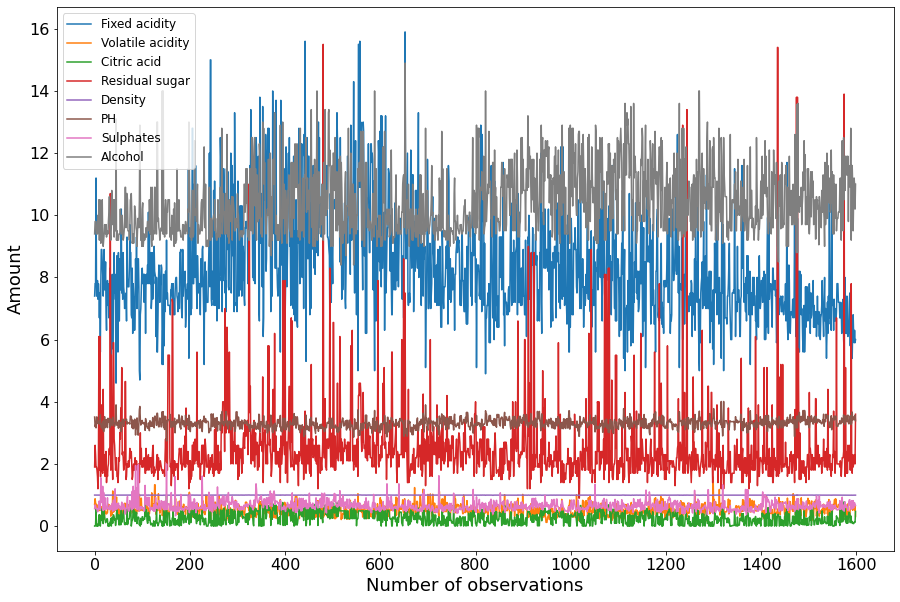

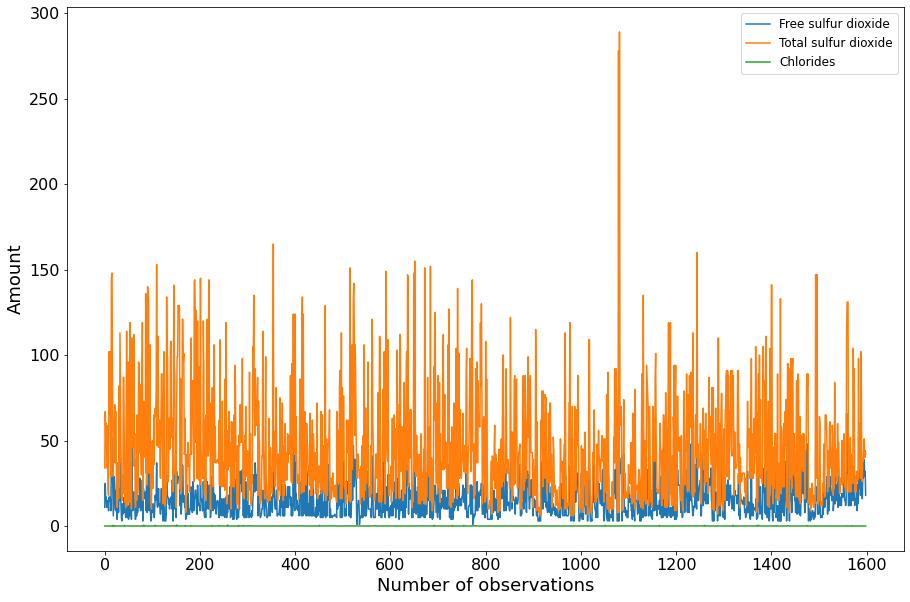

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(df.index.values, df['fixed acidity'], label = "Fixed acidity")
plt.plot(df.index.values, df['volatile acidity'], label = "Volatile acidity")
plt.plot(df.index.values, df['citric acid'], label = "Citric acid")
plt.plot(df.index.values, df['residual sugar'], label = "Residual sugar")

plt.plot(df.index.values, df['density'], label = "Density")
plt.plot(df.index.values, df['pH'], label = "PH")
plt.plot(df.index.values, df['sulphates'], label = "Sulphates") 
plt.plot(df.index.values, df['alcohol'], label = "Alcohol") 
plt.xlabel("Number of observations",fontsize=18)
plt.ylabel("Amount",fontsize=18)
plt.legend(fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

fig = plt.figure(figsize=(15,10))
plt.plot(df.index.values, df['free sulfur dioxide'], label = "Free sulfur dioxide")
plt.plot(df.index.values, df['total sulfur dioxide'], label = "Total sulfur dioxide")
plt.plot(df.index.values, df['chlorides'], label = "Chlorides")
plt.xlabel("Number of observations",fontsize=18)
plt.ylabel("Amount",fontsize=18)
plt.legend(fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In the following figure, we plot the correlation matrix in order to have a quick look at correlation between features and to have an idea about which of the features are expected to be excluded from the dataset during feature selection. As a rule of thumb, when absolute value of a correlation coeffient $r$ between two features is greater than 0.7, that is defined as a strong correlation. It can be seen from the correlation matrix that there are no values greater than 0.7. However, some features have a moderate correlation with $0.5 < |r| < 0.7$ and may end up getting eliminated from the dataset during feature selection.

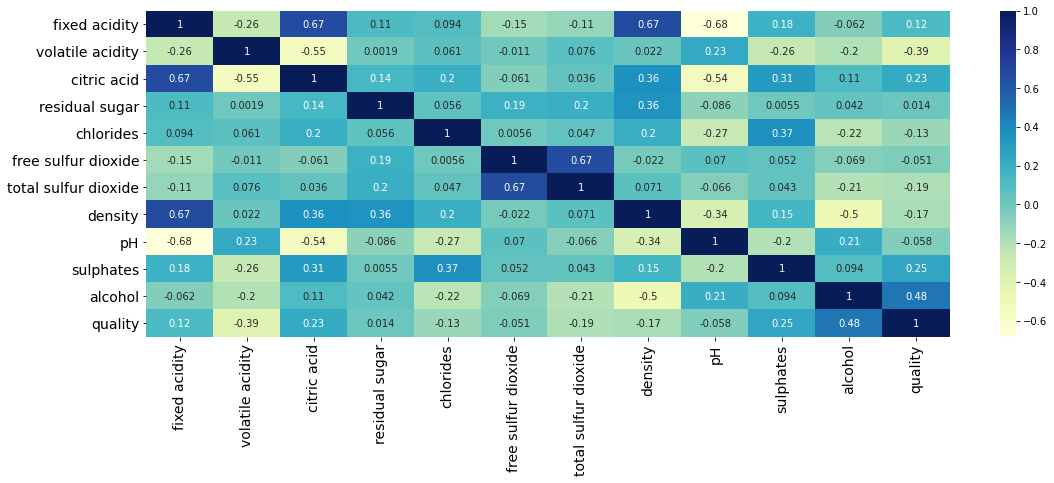

In [ ]:
Corr = df.corr()
sn.heatmap(Corr, annot=True,cmap="YlGnBu")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 4.2 Feature Selection
### 4.2.1 Backward Elimination 
We started with using the feature selection method of Backward Elimination in order to identify which features are most relevant in our dataset and exclude the ones that are irrelevant. For performing Backward Elimination, we set the significance level at 5% or P-value at 0.05, which means that features with highest P-value > 0.05 will be removed from our model in each iteration.

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(x)
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[5 5 5 ... 6 5 6]


In [ ]:
import statsmodels.api as sm
xb=np.append(arr=np.ones((1599,1)).astype(int), values=x,axis=1)
x_opt= xb[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
regressor_ols=sm.OLS(y,x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          1.79e-145
Time:                        17:44:20   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9652     21.195      1.036      0.300     -19.607      63.538
x1             0.0250      0.026      0.963      0.336      -0.026       0.076
x2            -1.0836      0.121     -8.948      0.000      -1.321      -0.846
x3            -0.1826      0.147     -1.240      0.215      -0.471       0.106
x4             0.0163      0.015      1.089      0.276      -0.013       0.046
x5            -1.8742      0.419     -4.470      0.000      -2.697      -1.052
x6             0.0044      0.002      2.009      0.045       0.000       0.009
x7            -0.0033      0.001     -4.480      0.000      -0.005      -0.002
x8           -17.8812     21.633     -0.827      0.409     -60.314      24.551
x9            -0.4137      0.192     -2.159      0.031      -0.789      -0.038
x10            0.9163      0.114      8.014      0.000       0.692       1.141
x11            0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_opt= xb[:,[0,1,2,3,4,5,6,7,9,10,11]]
regressor_ols=sm.OLS(y,x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.43
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          2.59e-146
Time:                        17:44:21   Log-Likelihood:                -1569.5
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1588   BIC:                             3220.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4538      0.613      7.271      0.000       3.252       5.655
x1             0.0081      0.016      0.507      0.612      -0.023       0.040
x2            -1.0964      0.120     -9.130      0.000      -1.332      -0.861
x3            -0.1836      0.147     -1.248      0.212      -0.472       0.105
x4             0.0090      0.012      0.743      0.458      -0.015       0.033
x5            -1.9067      0.417     -4.568      0.000      -2.725      -1.088
x6             0.0045      0.002      2.087      0.037       0.000       0.009
x7            -0.0033      0.001     -4.560      0.000      -0.005      -0.002
x8            -0.5043      0.157     -3.210      0.001      -0.812      -0.196
x9             0.8929      0.111      8.062      0.000       0.676       1.110
x10            0.2927      0.017     16.883      0.000       0.259       0.327
==============================================================================
Omnibus:                       25.732   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.114
Skew:                          -0.160   Prob(JB):                     5.29e-09
Kurtosis:                       3.685   Cond. No.                     2.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:

x_opt= xb[:,[0,2,3,4,5,6,7,9,10,11]]
regressor_ols=sm.OLS(y,x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     99.39
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          2.86e-147
Time:                        17:44:21   Log-Likelihood:                -1569.6
No. Observations:                1599   AIC:                             3159.
Df Residuals:                    1589   BIC:                             3213.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6583      0.461     10.103      0.000       3.754       5.563
x1            -1.0815      0.116     -9.292      0.000      -1.310      -0.853
x2            -0.1426      0.123     -1.160      0.246      -0.384       0.099
x3             0.0094      0.012      0.782      0.434      -0.014       0.033
x4            -1.9616      0.403     -4.867      0.000      -2.752      -1.171
x5             0.0046      0.002      2.128      0.033       0.000       0.009
x6            -0.0034      0.001     -4.889      0.000      -0.005      -0.002
x7            -0.5465      0.133     -4.103      0.000      -0.808      -0.285
x8             0.8969      0.110      8.121      0.000       0.680       1.114
x9             0.2917      0.017     16.955      0.000       0.258       0.325
==============================================================================
Omnibus:                       25.081   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.843
Skew:                          -0.159   Prob(JB):                     9.99e-09
Kurtosis:                       3.672   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_opt= xb[:,[0,2,3,5,6,7,9,10,11]]
regressor_ols=sm.OLS(y,x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     111.8
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          3.55e-148
Time:                        17:44:21   Log-Likelihood:                -1569.9
No. Observations:                1599   AIC:                             3158.
Df Residuals:                    1590   BIC:                             3206.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6681      0.461     10.129      0.000       3.764       5.572
x1            -1.0736      0.116     -9.260      0.000      -1.301      -0.846
x2            -0.1295      0.122     -1.064      0.288      -0.368       0.109
x3            -1.9494      0.403     -4.841      0.000      -2.739      -1.160
x4             0.0048      0.002      2.218      0.027       0.001       0.009
x5            -0.0034      0.001     -4.840      0.000      -0.005      -0.002
x6            -0.5492      0.133     -4.125      0.000      -0.810      -0.288
x7             0.8914      0.110      8.088      0.000       0.675       1.108
x8             0.2929      0.017     17.099      0.000       0.259       0.326
==============================================================================
Omnibus:                       23.385   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.045
Skew:                          -0.150   Prob(JB):                     4.05e-08
Kurtosis:                       3.649   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_opt= xb[:,[0,2,5,6,7,9,10,11]]
regressor_ols=sm.OLS(y,x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          5.32e-149
Time:                        17:44:21   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4301      0.403     10.995      0.000       3.640       5.220
x1            -1.0128      0.101    -10.043      0.000      -1.211      -0.815
x2            -2.0178      0.398     -5.076      0.000      -2.798      -1.238
x3             0.0051      0.002      2.389      0.017       0.001       0.009
x4            -0.0035      0.001     -5.070      0.000      -0.005      -0.002
x5            -0.4827      0.118     -4.106      0.000      -0.713      -0.252
x6             0.8827      0.110      8.031      0.000       0.667       1.098
x7             0.2893      0.017     17.225      0.000       0.256       0.322
==============================================================================
Omnibus:                       24.204   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.245
Skew:                          -0.156   Prob(JB):                     2.22e-08
Kurtosis:                       3.657   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The following features were eliminated during Backward Elimination iterations:

1st Iteration - Density (P-value: 0.409)

2nd Iteration - Fixed Acidity (P-value: 0.612)

3rd Iteration - Residual Sugar (P-value: 0.434)

4th Iteration - Citric Acid (P-value: 0.288)

5th Iteration - (no features with P-value > 0.05)

As a result of 5 iternations of Backward Elimination, we removed density, fixed acidity, residual sugar and citric acid and we are left with 7 features that have an effect on the quality of the wine which is our target variable, therefore, we fit the model with the remaining 7 parameters and we split the dataset into 70% training and 30% test sets.

In [ ]:
df1=df.drop(columns=['fixed acidity','citric acid','residual sugar','density'])
df1

volatile acidity  chlorides  ...  alcohol  quality
0                0.700      0.076  ...      9.4        5
1                0.880      0.098  ...      9.8        5
2                0.760      0.092  ...      9.8        5
3                0.280      0.075  ...      9.8        6
4                0.700      0.076  ...      9.4        5
...                ...        ...  ...      ...      ...
1594             0.600      0.090  ...     10.5        5
1595             0.550      0.062  ...     11.2        6
1596             0.510      0.076  ...     11.0        6
1597             0.645      0.075  ...     10.2        5
1598             0.310      0.067  ...     11.0        6

[1599 rows x 8 columns]

Now we will transforme the data frame into matrixes for further steps

In [ ]:
#matrix of independant variables (x), and the matrix of dependant variables (y)
x1 = df1.iloc[:, :-1].values
y1 = df1.iloc[:, -1].values
print(x1)
print(y1)

[[ 0.7    0.076 11.    ...  3.51   0.56   9.4  ]
 [ 0.88   0.098 25.    ...  3.2    0.68   9.8  ]
 [ 0.76   0.092 15.    ...  3.26   0.65   9.8  ]
 ...
 [ 0.51   0.076 29.    ...  3.42   0.75  11.   ]
 [ 0.645  0.075 32.    ...  3.57   0.71  10.2  ]
 [ 0.31   0.067 18.    ...  3.39   0.66  11.   ]]
[5 5 5 ... 6 5 6]


When splitting Train/Test sets, we decided to use 30% of total dataset to ensure Out of Sample Accuracy and avoid overfitting.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 1,stratify=y1)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trainstd = sc.fit_transform(x_train)
x_teststd = sc.transform(x_test)

### Ordinary Least Squares

In [ ]:
# least squares regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

regressor = LinearRegression()
regressor.fit(x_trainstd, y_train)
y_pred = regressor.predict(x_teststd)
r2_ols=r2_score(y_test, y_pred,multioutput='variance_weighted')
mse_ols=mean_squared_error(y_test, y_pred)

print('R^2 Score: {0:.3f}'.format(r2_ols))
print('MSE: {0:.3f}'.format(mse_ols))

R^2 Score: 0.366
MSE: 0.411


In order to ensure performance of the model, we perform 10-fold cross-validation on the training set and compare it with the R2 score obtained initially.

In [ ]:
# k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor,X= x_train,y= y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std()))

Accuracy: 0.332 (+/- 0.076)


### Ridge Regression

In [ ]:
# Ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=5)
ridge_regressor.fit(x_trainstd, y_train)
y_predridge = ridge_regressor.predict(x_teststd)
r2_ridge=r2_score(y_test, y_predridge,multioutput='variance_weighted')
mse_ridge=mean_squared_error(y_test, y_predridge)

print('R^2 Score: {0:.3f}'.format(r2_ridge))
print('MSE: {0:.3f}'.format(mse_ridge))
print(ridge_regressor.best_params_)

R^2 Score: 0.366
MSE: 0.411
{'alpha': 20}


In [ ]:
#k-Fold cross validation
accuracies = cross_val_score(estimator = ridge_regressor,X= x_train,y= y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std()))

Accuracy: 0.332 (+/- 0.076)


It can be seen that the results of Ridge regression are similar to that of OLS. This is expected because the value of alpha is too small to have any significant impact on the results of OLS.

### LASSO

In [ ]:
#Lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, cv = 5)
lasso_regressor.fit(x_trainstd, y_train)
y_predlasso = lasso_regressor.predict(x_teststd)
r2_lasso=r2_score(y_test, y_predlasso, multioutput='variance_weighted')
mse_lasso=mean_squared_error(y_test, y_predlasso)

print('R^2 Score: {0:.3f}'.format(r2_lasso))
print('MSE: {0:.3f}'.format(mse_lasso))
print(lasso_regressor.best_params_)

R^2 Score: 0.366
MSE: 0.411
{'alpha': 0.001}


In [ ]:
#k-Fold cross validation
accuracies = cross_val_score(estimator = lasso_regressor,X= x_train,y= y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std()))

Accuracy: 0.333 (+/- 0.076)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.651047796951389, tolerance: 0.06587269116186693
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.38938207926418, tolerance: 0.06689751737835146
  positive)


### Elastic Net

In [ ]:
#Elastic Net regression
from sklearn.linear_model import ElasticNet

Elastic=ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
Elastic_regressor = GridSearchCV(Elastic, parameters, cv = 5)
Elastic_regressor.fit(x_trainstd, y_train)
y_predelastic = Elastic_regressor.predict(x_teststd)
r2_elastic=r2_score(y_test, y_predelastic, multioutput='variance_weighted')
mse_elastic=mean_squared_error(y_test, y_predelastic)

print('R^2 Score: {0:.3f}'.format(r2_elastic))
print('MSE: {0:.3f}'.format(mse_elastic))
print(Elastic_regressor.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32577364468130554, tolerance: 0.0590561383928571
  positive)


R^2 Score: 0.366
MSE: 0.411
{'alpha': 0.001}


In [ ]:
#k-Fold cross validation
accuracies = cross_val_score(estimator = Elastic_regressor,X= x_train,y= y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.98051925000587, tolerance: 0.051808064516129
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.01637210400139, tolerance: 0.054208064516128994
  positive)


Accuracy: 0.333 (+/- 0.076)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.29759683107747, tolerance: 0.05377571251548943
  positive)


-------------------------------------------------------

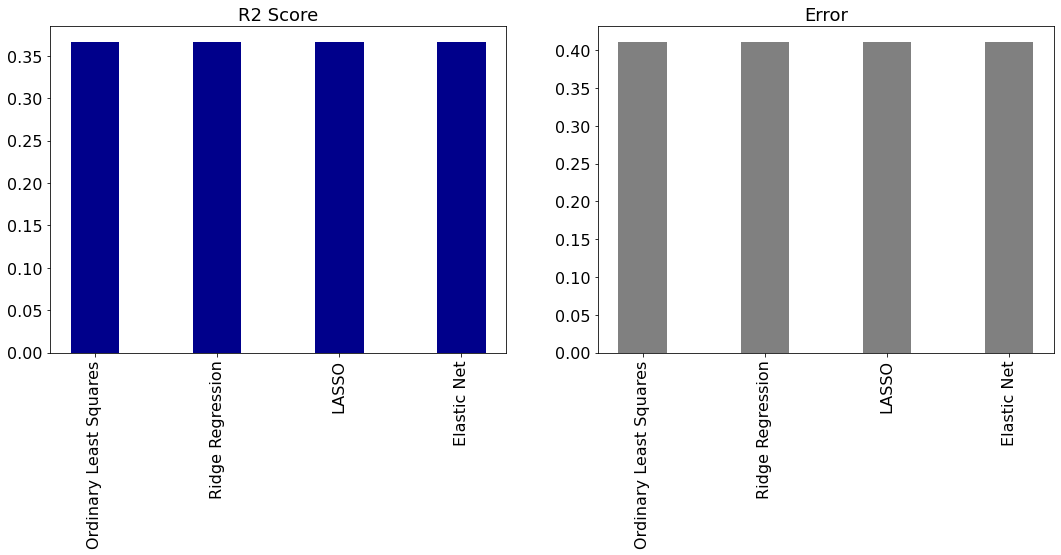

In [ ]:
# Comparing R2 Score and MSE
reg_methods = ['Ordinary Least Squares', 'Ridge Regression', 'LASSO', 'Elastic Net']
r2score = [r2_ols,r2_ridge,r2_lasso,r2_elastic]
mse = [mse_ols,mse_ridge,mse_lasso,mse_elastic]

plt.rcParams['figure.figsize'] = (18, 6)
plt.figure()

plt.subplot(1, 2, 1)
plt.bar(reg_methods, r2score,width=0.4,color='darkblue')
plt.title('R2 Score',fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(reg_methods, mse,width=0.4,color='grey')
plt.title('Error',fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16);

The R2 Score and the Mean Squared Error for all four regression models are same. It can also be observed that that error is too large to consider these methods well-suited for our dataset. Since our target variable is categorical data, we now move on to try Classification methods instead of Regression. 

### Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state = 0)
lgr.fit(x_trainstd, y_train)
y_predlr = lgr.predict(x_teststd)
lgr_score=lgr.score(x_teststd, y_test)
print('Accuracy: {0:.3f}'.format(lgr_score))

Accuracy: 0.604


### K-Nearest Neighbors

In [ ]:
#K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
kn.fit(x_trainstd, y_train)
y_predknn = kn.predict(x_teststd)
kn_score = kn.score(x_teststd, y_test)
print('Accuracy: {0:.3f}'.format(kn_score))

Accuracy: 0.588


### Decision Tree Classification

In [ ]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dctr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dctr .fit(x_trainstd, y_train)
y_preddctr = dctr.predict(x_teststd)
dctr_score = dctr.score(x_teststd, y_test)
print('Accuracy: {0:.3f}'.format(dctr_score))

Accuracy: 0.596


### Random Forest Classification

In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 125, criterion = 'entropy', random_state = 0)
rf.fit(x_trainstd, y_train)
y_predrfc = rf.predict(x_teststd)
rf_score = rf.score(x_teststd, y_test)
print('Accuracy: {0:.3f}'.format(rf_score))

Accuracy: 0.690


### Naive Bayes

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_trainstd, y_train)
y_predgnb = nb.predict(x_teststd)
nb_score = nb.score(x_teststd, y_test)
print('Accuracy: {0:.3f}'.format(nb_score))

Accuracy: 0.585


### Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_trainstd, y_train)
y_predsgd = sgd.predict(x_teststd)
sgd_score = sgd.score(x_teststd, y_test)
print('Accuracy: {0:.3f}'.format(sgd_score))

Accuracy: 0.535


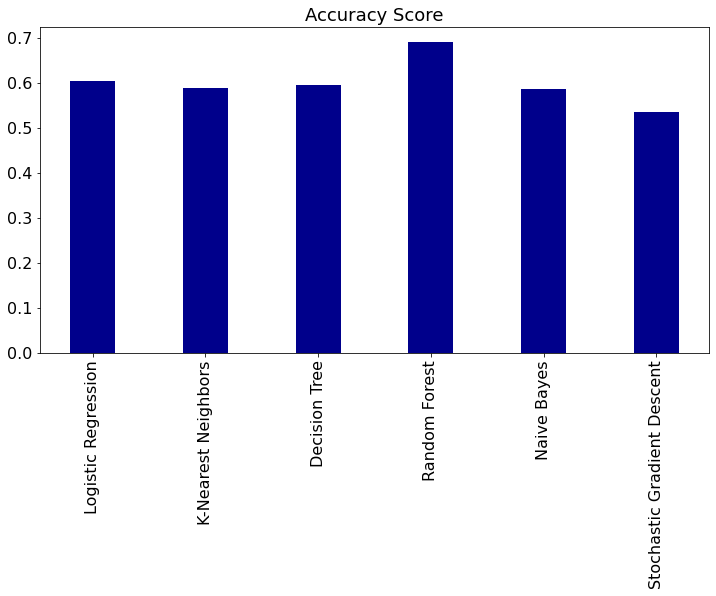

In [ ]:
# Comparing the Accuracy of Classification Methods
method = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Stochastic Gradient Descent']
score = [lgr_score,kn_score,dctr_score,rf_score,nb_score,sgd_score]

plt.rcParams['figure.figsize'] = (12, 6)
plt.figure()
plt.bar(method, score,width=0.4,color='darkblue')
plt.title('Accuracy Score',fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16);

## Principal Component Analysis (Feature Extraction)

We will now use Principal Component Analysis (PCA) on the original dataset to check whether we can achieve the same accuracy by using dimensional reduction through PCA. 

In [ ]:
# Perparing the dataset for PCA
# ===========================

X = df.drop(['quality'], axis=1)
Y = df['quality']

# Splitting dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

# Scaling and Standardizing
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

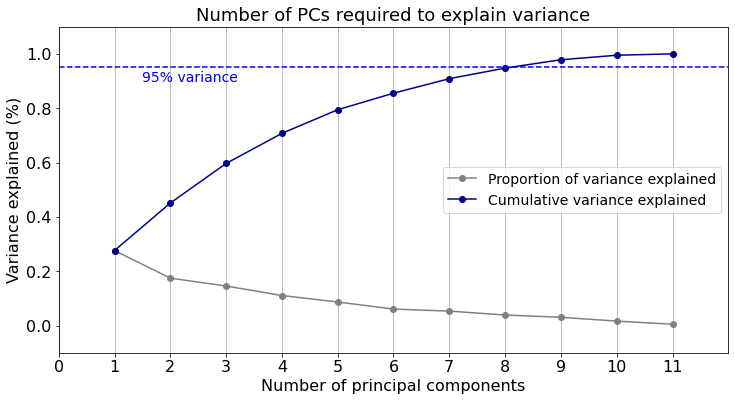

In [ ]:
# Performing PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_std)

plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
plt.ylim(-0.1,1.1)
plt.xlim(0,12)
plt.plot(range(1, 12), pca.explained_variance_ratio_, marker='o', linestyle='-', color='grey')
plt.plot(range(1, 12), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='darkblue')
plt.xticks(range(0, 12),fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Number of principal components',fontsize=16)
plt.ylabel('Variance explained (%)',fontsize=16)
plt.title('Number of PCs required to explain variance',fontsize=18)

plt.axhline(y=0.95, color='blue', linestyle='--')
plt.text(1.5, 0.90, '95% variance', color = 'blue', fontsize=14)
ax.grid(axis='x')

plt.legend(['Proportion of variance explained','Cumulative variance explained'],loc='center right',fontsize=14)
plt.show()

### Dimensional Reduction

PCA shows that 95% of variance can be explained using the first 8 principal components, therefore, we will now transform the original data set using 8 principal compoents and then apply supervised learning methods to make the predictions. 

In [ ]:
# Dimensional reduction
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Logistic Regression

In [ ]:
# Logistic Regression on PCA transformed data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca, Y_train)
y_pred_lr = lr.predict(X_test_pca)
mc_lr = (Y_test != y_pred_lr).sum()
acc_lr = accuracy_score(Y_test, y_pred_lr)

print('Misclassified samples: {0}'.format(mc_lr))
print('Accuracy: {0:.3f}'.format(acc_lr))

Misclassified samples: 202
Accuracy: 0.579


### K-Nearest Neighbors

In [ ]:
#K-Nearest Neighbors (K-NN) on PCA transformed data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn.fit(X_train_pca, Y_train)
y_pred_knn = knn.predict(X_test_pca)
mc_knn = (Y_test != y_pred_knn).sum()
acc_knn = accuracy_score(Y_test, y_pred_knn)

print('Misclassified samples: {0}'.format(mc_knn))
print('Accuracy: {0:.3f}'.format(acc_knn))

Misclassified samples: 197
Accuracy: 0.590


### Decision Tree Classification

In [ ]:
# Decision Tree Classification on PCA transformed data
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train_pca, Y_train)
y_pred_dtc = dtc.predict(X_test_pca)
mc_dtc = (Y_test != y_pred_dtc).sum()
acc_dtc = accuracy_score(Y_test, y_pred_dtc)

print('Misclassified samples: {0}'.format(mc_dtc))
print('Accuracy: {0:.3f}'.format(acc_dtc))

Misclassified samples: 193
Accuracy: 0.598


### Random Forest Classification

In [ ]:
# Random Forest Classification on PCA transformed data

rfc = RandomForestClassifier(n_estimators = 125, criterion = 'entropy', random_state = 0)
rfc.fit(X_train_pca, Y_train)
y_pred_rfc = rfc.predict(X_test_pca)
mc_rfc = (Y_test != y_pred_rfc).sum()
acc_rfc = accuracy_score(Y_test, y_pred_rfc)

print('Misclassified samples: {0}'.format(mc_rfc))
print('Accuracy: {0:.3f}'.format(acc_rfc))

Misclassified samples: 142
Accuracy: 0.704


### Naive Bayes

In [ ]:
# Gaussian Naive Bayes on PCA transformed data
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_pca, Y_train)
y_pred_gnb = gnb.predict(X_test_pca)
mc_gnb = (Y_test != y_pred_gnb).sum()
acc_gnb = accuracy_score(Y_test, y_pred_gnb)

print('Misclassified samples: {0}'.format(mc_gnb))
print('Accuracy: {0:.2f}'.format(acc_gnb))

Misclassified samples: 211
Accuracy: 0.56


### Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent on PCA transformed data
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train_pca, Y_train)
y_pred_sgd = sgd.predict(X_test_pca)
mc_sgd = (Y_test != y_pred_sgd).sum()
acc_sgd = accuracy_score(Y_test, y_pred_sgd)

print('Misclassified samples: {0}'.format(mc_sgd))
print('Accuracy: {0:.2f}'.format(acc_sgd))

Misclassified samples: 262
Accuracy: 0.45


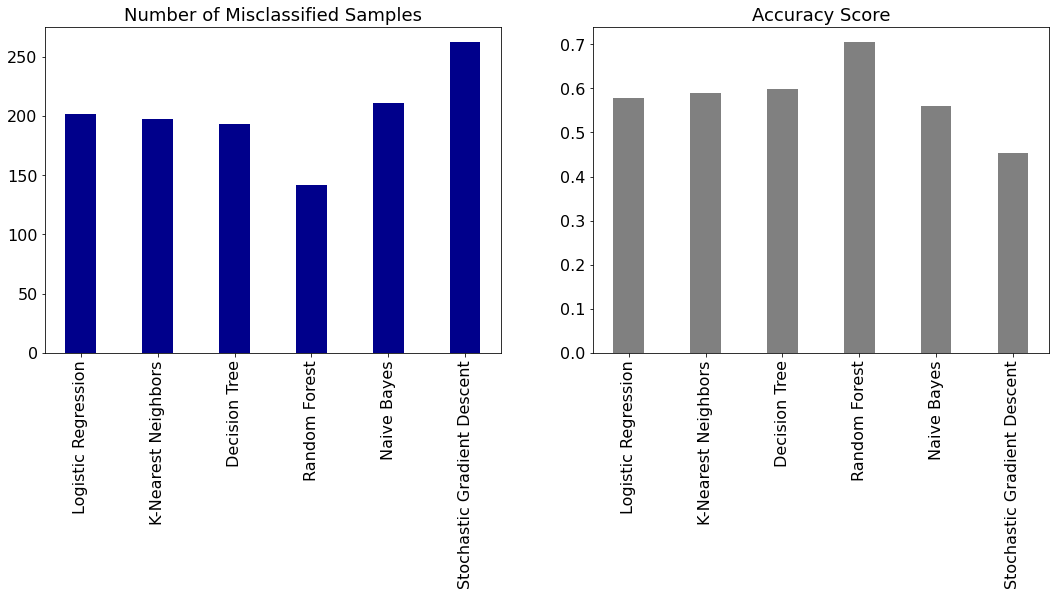

In [ ]:
methods = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Stochastic Gradient Descent']
misclassified = [mc_lr,mc_knn,mc_dtc,mc_rfc,mc_gnb,mc_sgd]
accuracy = [acc_lr,acc_knn,acc_dtc,acc_rfc,acc_gnb,acc_sgd]

plt.rcParams['figure.figsize'] = (18, 6)
plt.figure()

plt.subplot(1, 2, 1)
plt.bar(methods, misclassified,width=0.4,color='darkblue')
plt.title('Number of Misclassified Samples',fontsize=18)
plt.xticks(rotation=90)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16);

plt.subplot(1, 2, 2)
plt.bar(methods, accuracy,width=0.4,color='grey')
plt.title('Accuracy Score',fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16);

We present the comparison between the accuracies obtained by the classification models after application of feature selection (Backward Elimination) and feature extraction (Principal Component Analysis) 

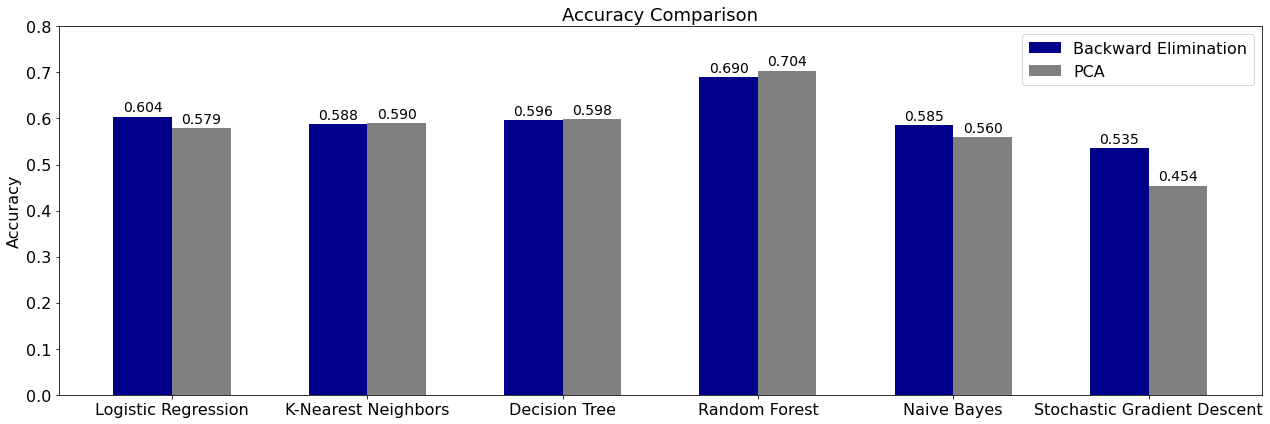

In [ ]:
# Plotting the comparison of accuracies obtained using Backward Elimination and PCA

x = np.arange(len(method))
width = 0.3 

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, score, width, label='Backward Elimination',color='darkblue')
bar2 = ax.bar(x + width/2, accuracy, width, label='PCA',color='grey')
ax.set_xticks(x)
ax.set_xticklabels(method)
plt.ylim(0,0.8)
plt.title('Accuracy Comparison',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.legend(fontsize=16)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{0:.3f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=14)
autolabel(bar1)
autolabel(bar2)

fig.tight_layout()

plt.show()

# Conclusion

In this project, we worked on building a machine learning model to predict red wine tasting preferences from an available set of data. Our dataset had 1599 observations of 11 features (physicochemical properties) and one target variable (quality).
We used both feature selection (backward elimination) and feature extraction (principal component analysis) to identify the most relevant features that affect the target variable. We began by using regression methods to build a model, however, those methods failed to provide a satisfactory result (low R2 scores). This is probably because the target variable (quality) is based on sensory evaluation (wine tasting) and is not a mathematically calculated quantity. Therefore, we treated the target variable as categorical data and focused on using classification methods to build a model. Out of the 6 classification methods used, Random Forest Classification turned out to be the best performing model with highest accuracy i.e. 69.0 % (with Backward Elimination) and 70.4 % (with PCA). 

# Reference

[1] Wine Quality Dataset source: http://archive.ics.uci.edu/ml/datasets/Wine+Quality [Online: Accessed 25-August-2020]

[2] Cortez, Paulo, et al. "Modeling wine preferences by data mining from physicochemical properties." Decision Support Systems 47.4 (2009): 547-553. 

[3] Ebeler, S. "Flavor Chemistry—Thirty Years of Progress." (1999): 409-422. 

[4] Shaw, Michael J., et al. "Knowledge management and data mining for marketing." Decision support systems 31.1 (2001): 127-137. 

[5] Peter Singh-vigilante, Using Wine Data Analytics to Map the Consumer Experience, April 18, 2019, from https://www.siroccoconsulting.com/wine-data-consumer-research/

[6] Ray, Sunil, and Business Analytics. "7 Types of Regression Techniques you should know!." Analytics Vidhy.7

[7] IBM Edx MOOC Machine Learning with Python: A Practical Introduction https://www.edx.org/course/machine-learning-with-python-a-practical-introduct

[8] James, Gareth, et al. An introduction to statistical learning. Vol. 112. New York: springer, 2013.

[9] Oliver Tomic, Kristian Hovde Liland, Kristin Tøndel, DAT121 Introduction Course for Data Scientists, NMBU

[10] Irizarry, Rafael A. Introduction to Data Science: Data Analysis and Prediction Algorithms with R. CRC Press, 2019.

[11] Provost, Foster, and Tom Fawcett. Data Science for Business: What you need to know about data mining and data-analytic thinking. " O'Reilly Media, Inc.", 2013.


 





 



